# BTVN Assignment 1: Làm quen với Python cho xử lý ảnh

Load ảnh và hiển thị đồng thời các cả các ảnh trong thư mục **img** trên jupyter notebook. Sau đó dùng thư viện openCV để biến đổi các bức ảnh thành chế độ đen trắng, HSV, Lab và hiển thị kết quả.

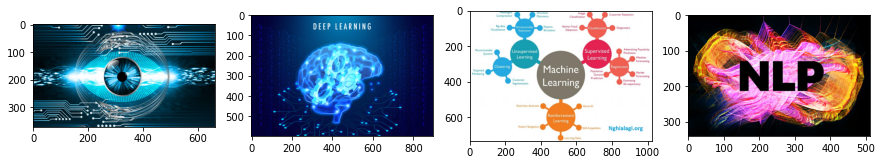

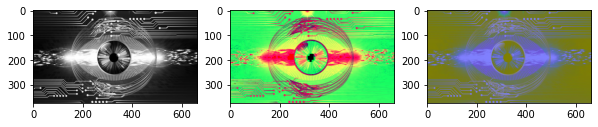

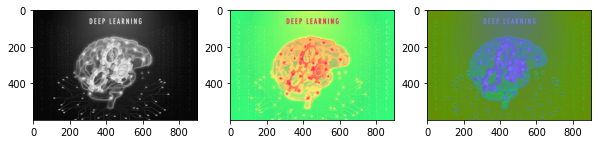

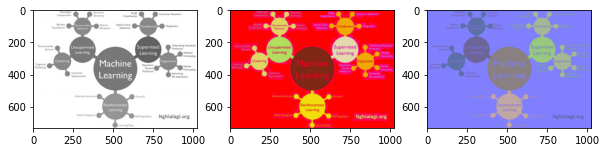

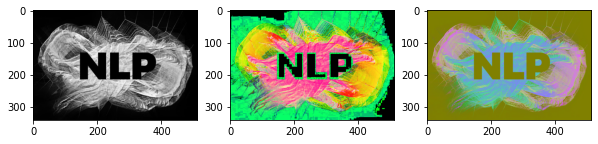

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

img_paths = os.listdir('img')
images = [cv2.imread(os.path.join('img', path)) for path in img_paths]
plt.figure(figsize=(15, 3))
for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
plt.show()

def plot_cvt(image):
    """
    :param image: cv2 array image of BGR
    :return:
    """
    i = 0
    for mode in [cv2.COLOR_BGR2GRAY, cv2.COLOR_BGR2HSV, cv2.COLOR_BGR2LAB]:
        plt.subplot(1, 3, i + 1)
        plt.imshow(cv2.cvtColor(cv2.cvtColor(image, mode), cv2.COLOR_BGR2RGB))
        i += 1

for image in images:
    plt.figure(figsize=(10, 3))
    plot_cvt(image)
    plt.show()

# BTVN Assignment 2

Trong folder pieces bao gồm các bức ảnh có cùng màu sắc với độ sáng khác nhau được cắt ra từ các bức ảnh rubik.   
Hãy biểu diễn và nhận xét sự thay đổi của các kênh màu khi có sự thay đổi về ánh sáng.

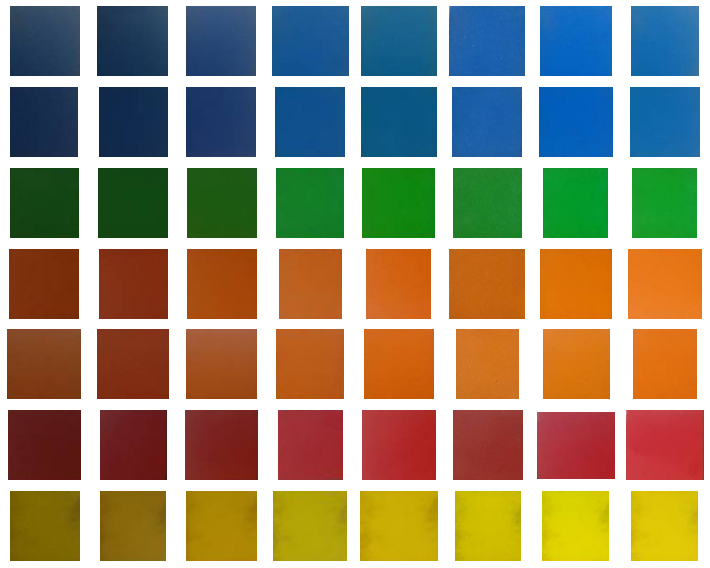

In [5]:
from pathlib import Path

img_paths = sorted(Path('pieces').glob('*.jpg'))
images = [cv2.imread(str(path)) for path in img_paths]

len(images) # == 56

plt.figure(figsize=(10, 8))
_ = 0
for img in images:
    plt.subplot(7, 8, _ + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    _ += 1
plt.show()

Ví dụ sau biểu diễn thang màu BGR với các ảnh màu vàng
Bạn hãy thực hiện trên các thang màu khác HSV, Lab, YCrCb và đưa ra nhận xét

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cv2,glob
import numpy as np

In [10]:
color = 'pieces/yellow'

Chọn 2 ảnh có ánh sáng tương tự nhau của màu vàng

In [21]:
# load tất cả các file trong folder
files = glob.glob(color + '*.jpg')
files.sort()
# files=files[6:9]

B = np.array([])
G = np.array([])
R = np.array([])

In [22]:
for fi in files[:]:
    # BGR
    im = cv2.imread(fi)
    b = im[:,:,0]
    b = b.reshape(b.shape[0]*b.shape[1])
    g = im[:,:,1]
    g = g.reshape(g.shape[0]*g.shape[1])
    r = im[:,:,2]
    r = r.reshape(r.shape[0]*r.shape[1])
    B = np.append(B,b)
    G = np.append(G,g)
    R = np.append(R,r)

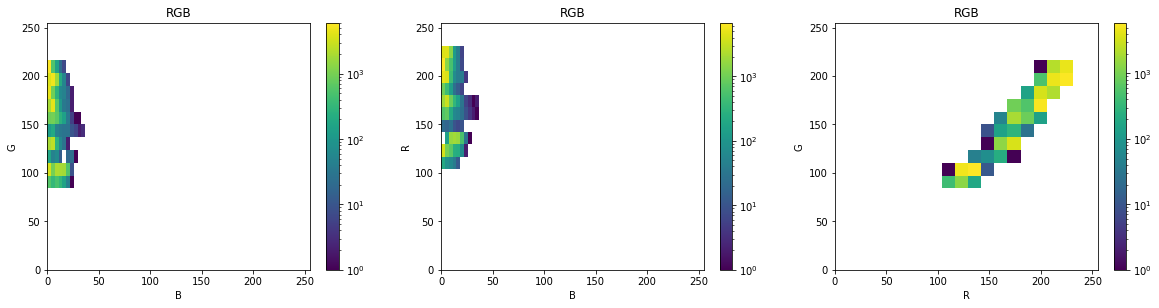

In [23]:
zoom = 0

# Plotting the histogram
nbins = 10
plt.figure(figsize=[20,10])
plt.subplot(2,3,1)
plt.hist2d(B, G, bins=nbins, norm=LogNorm())
plt.xlabel('B')
plt.ylabel('G')
plt.title('RGB')
if not zoom:
    plt.xlim([0,255])
    plt.ylim([0,255])
plt.colorbar()
plt.subplot(2,3,2)
plt.hist2d(B, R, bins=nbins, norm=LogNorm())
plt.colorbar()
plt.xlabel('B')
plt.ylabel('R')
plt.title('RGB')
if not zoom:
    plt.xlim([0,255])
    plt.ylim([0,255])
plt.subplot(2,3,3)
plt.hist2d(R, G, bins=nbins, norm=LogNorm())
plt.colorbar()
plt.xlabel('R')
plt.ylabel('G')
plt.title('RGB')
if not zoom:
    plt.xlim([0,255])
    plt.ylim([0,255])

# BTVN Assignment 3

- Sử dụng không gian màu để phát hiện da trong bức ảnh
- có thể sử dụng các ngưỡng sau :
  - 0<=H<=17 and 15<=S<=170 and 0<=V<=255
  - 0<=Y<=255 and 135<=Cr<=180 and 85<=Cb<=135
  - 0<=Y<=255 and 150<=Cr<=200 and 100<=Cb<=150
- Có thể kết hợp các kết quả 2 không gian với nhau
- So sánh và nhận xét trên các tập dữ liệu trong folder skin
-Tài liệu tham khảo: 
     https://linkinghub.elsevier.com/retrieve/pii/S0262885620300573
     Shaik_ICRTC-2015: Comparative Study of Skin Color Detection and Segmentation in HSV and YCbCr Color Space

In [7]:
from tqdm import tqdm

def result(img_path):

    sol_path = os.path.sep.join(img_path.split(os.path.sep)[:-1] + ['output.jpg'])

    # BGR
    img = cv2.imread(img_path)
    sol = cv2.imread(sol_path)
    height, width, depth = img.shape
    # HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Gray, but in BGR
    buffer_hsv = np.empty(img.shape, dtype=np.uint8)

    for i in tqdm(range(height)):
        for j in range(width):
            buffer_hsv[i, j, :] = 0 if 0 <= img_hsv[i, j, 0] <= 17 and \
                                     15 <= img_hsv[i, j, 1] <= 170 and \
                                     0 <= img_hsv[i, j, 2] <= 255 \
                else 255

    # YCrBr
    img_ybrcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

    # Gray, but in BGR
    buffer_ycrbr_1 = np.empty(img.shape, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            buffer_ycrbr_1[i, j, :] = 0 if 0 <= img_ybrcr[i, j, 0] <= 255 and \
                                     135 <= img_ybrcr[i, j, 1] <= 180 and \
                                     85 <= img_ybrcr[i, j, 2] <= 135 \
                else 255

    # Gray, but in BGR
    buffer_ycrbr_2 = np.empty(img.shape, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            buffer_ycrbr_2[i, j, :] = 0 if 0 <= img_ybrcr[i, j, 0] <= 255 and \
                                             150 <= img_ybrcr[i, j, 1] <= 200 and \
                                             100 <= img_ybrcr[i, j, 2] <= 150 \
                else 255

    img_collage = np.concatenate(
        [buffer_hsv, buffer_ycrbr_1, buffer_ycrbr_2],
        axis=1
    )

    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(sol, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_collage, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()


img_paths = [str(p) for p in Path('skin').glob('**/*.jpg') if 'output' not in str(p)]
for path in img_paths:
    print(path)
    result(path)
    plt.show()